C:\Users\19770\AppData\Local\Temp\ipykernel_9420\542977269.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_rushers['Name'], rotation=45)
C:\Users\19770\anaconda3\lib\site-packages\matplotlib\transforms.py:378: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]
posx and posy should be finite values
posx and posy should be finite values


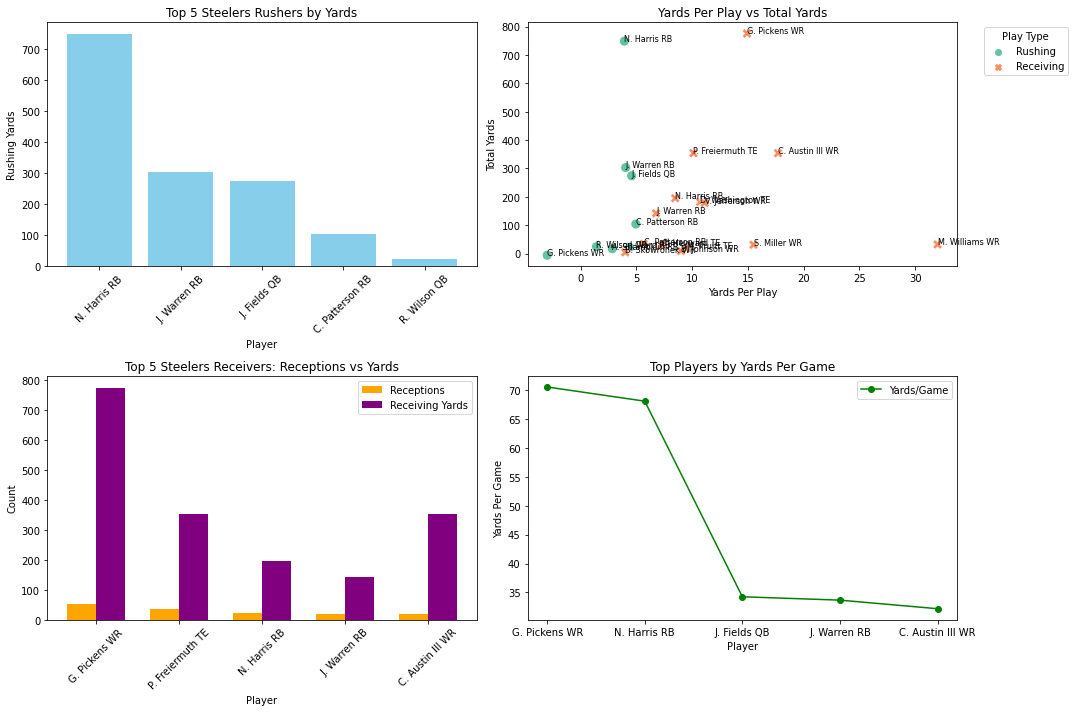

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Load the CSV files
rushing_df = pd.read_csv('steelers_rushing.csv')
receiving_df = pd.read_csv('steelers_receiving.csv')

# Filter out the "Total" rows to focus only on individual performances
rushing_df = rushing_df[rushing_df['Name'] != 'Total']
receiving_df = receiving_df[receiving_df['Name'] != 'Total']

# Calculate Efficiency Metrics
rushing_df['Yards_Per_Play'] = rushing_df['YDS'] / rushing_df['CAR']  # Yards per carry
receiving_df['Yards_Per_Play'] = receiving_df['YDS'] / receiving_df['REC']  # Yards per reception

# Combine rushing and receiving for unified analysis
rushing_df['Type'] = 'Rushing'
receiving_df['Type'] = 'Receiving'
combined_df = pd.concat([rushing_df[['Name', 'Yards_Per_Play', 'YDS', 'Type']],
                         receiving_df[['Name', 'Yards_Per_Play', 'YDS', 'Type']]])

# Set up the figure with subplots
fig = plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)

# Panel 1: Rushing Yards (Bar Chart)
ax1 = fig.add_subplot(gs[0, 0])
top_rushers = rushing_df.sort_values(by='YDS', ascending=False).head(5)
ax1.bar(top_rushers['Name'], top_rushers['YDS'], color='skyblue')
ax1.set_title('Top 5 Steelers Rushers by Yards')
ax1.set_xlabel('Player')
ax1.set_ylabel('Rushing Yards')
ax1.set_xticklabels(top_rushers['Name'], rotation=45)

# Panel 2: Unified Yards Per Play vs Total Yards (Scatter Plot)
ax2 = fig.add_subplot(gs[0, 1])
sns.scatterplot(
    x='Yards_Per_Play', y='YDS', hue='Type', style='Type', data=combined_df, ax=ax2, s=100, palette='Set2'
)
for i in range(combined_df.shape[0]):
    ax2.text(combined_df['Yards_Per_Play'].iloc[i],
             combined_df['YDS'].iloc[i],
             combined_df['Name'].iloc[i],
             fontsize=8)
ax2.set_title('Yards Per Play vs Total Yards')
ax2.set_xlabel('Yards Per Play')
ax2.set_ylabel('Total Yards')
ax2.legend(title='Play Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Panel 3: Receiving Yards vs Receptions (Grouped Bar Chart)
ax3 = fig.add_subplot(gs[1, 0])
top_receivers = receiving_df.sort_values(by='REC', ascending=False).head(5)
width = 0.35
x = range(len(top_receivers['Name']))
ax3.bar(x, top_receivers['REC'], width, label='Receptions', color='orange')
ax3.bar(
    [p + width for p in x], top_receivers['YDS'], width, label='Receiving Yards', color='purple'
)
ax3.set_title('Top 5 Steelers Receivers: Receptions vs Yards')
ax3.set_xlabel('Player')
ax3.set_ylabel('Count')
ax3.set_xticks([p + width / 2 for p in x])
ax3.set_xticklabels(top_receivers['Name'], rotation=45)
ax3.legend()

# Panel 4: Total Yards Per Game (Line Plot)
ax4 = fig.add_subplot(gs[1, 1])
rushing_df['Total_Yards'] = rushing_df['YDS'] / rushing_df['GP']
receiving_df['Total_Yards'] = receiving_df['YDS'] / receiving_df['GP']
top_total_yards = pd.concat(
    [rushing_df[['Name', 'Total_Yards']], receiving_df[['Name', 'Total_Yards']]]
).sort_values(by='Total_Yards', ascending=False).head(5)
ax4.plot(
    top_total_yards['Name'], top_total_yards['Total_Yards'], marker='o', color='green', label='Yards/Game'
)
ax4.set_title('Top Players by Yards Per Game')
ax4.set_xlabel('Player')
ax4.set_ylabel('Yards Per Game')
ax4.legend()

# Adjust layout and display the figure
plt.tight_layout()
plt.show()
